<Axes: xlabel='0', ylabel='1'>

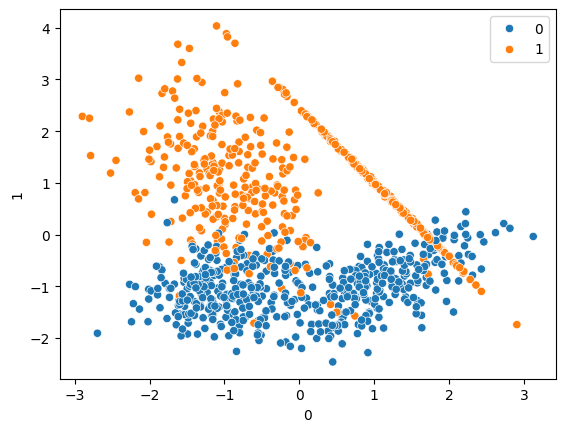

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
x
y

pd.DataFrame(x)[0]

sns.scatterplot(
    x=pd.DataFrame(x)[0],
    y=pd.DataFrame(x)[1],
    hue=y
)


In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)



In [4]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

svc.fit(x_train,y_train)

svc.coef_

y_pred=svc.predict(x_test)

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       125
           1       0.96      0.87      0.91       125

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[120   5]
 [ 16 109]]


In [7]:
rbf=SVC(kernel='rbf')

rbf.fit(x_train,y_train)

y_pred1=rbf.predict(x_test)

print(classification_report(y_test,y_pred1))

print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       125
           1       0.95      0.83      0.89       125

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[120   5]
 [ 21 104]]


In [8]:
polynomial=SVC(kernel='poly')

polynomial.fit(x_train,y_train)

y_pred2=polynomial.predict(x_test)

print(classification_report(y_test,y_pred2))

print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       125
           1       0.90      0.86      0.88       125

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[113  12]
 [ 17 108]]


In [11]:
sigma=SVC(kernel='sigmoid')

sigma.fit(x_train,y_train)

y_pred3=sigma.predict(x_test)

print(classification_report(y_test,y_pred3))

print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       125
           1       0.89      0.92      0.91       125

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[111  14]
 [ 10 115]]


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']
            }

grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [14]:
grid.best_params_

y_pred4=grid.predict(x_test)

print(classification_report(y_test,y_pred4))

print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       125
           1       0.97      0.90      0.93       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[121   4]
 [ 12 113]]


C = Regulation Parameter

gamma=Influence of a single data point

Total Combinations: 5(C)*5(gamma)*1(kernel)=25 models

Here we used GridSearchCV is used to perform hyperparmeter tunning.

It check all combos of given parameters using cv and selects the model with best performance....